In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LINKNET_LOG_FILE = 'C:/_Repositories/Building_Detection/linknet_s512_b18_adam.log'
UNET_LOG_FILE = 'C:/_Repositories/Building_Detection/unet_s512_b18_adam.log'

In [3]:
def get_dscs_from_log(log_file):
    with open (log_file, 'r') as f:
        log = f.readlines()
    dscs = [float(s.split()[-1]) for s in log if 'val_sorensen_dice_coef' in s]
    return dscs, max(dscs), dscs.index(max(dscs))

In [4]:
unet_dscs, max_dsc_unet, idx_unet = get_dscs_from_log(UNET_LOG_FILE)

In [5]:
max_dsc_unet, idx_unet

(0.7653, 95)

In [6]:
linknet_dscs, max_dsc_linknet, idx_linknet = get_dscs_from_log(LINKNET_LOG_FILE)

In [7]:
max_dsc_linknet, idx_linknet

(0.9216, 71)

In [8]:
epochs = range(1, 101)

In [9]:
df = pd.DataFrame(data={'epochs': epochs, 'unet_dsc': unet_dscs, 'linknet_dsc': linknet_dscs})
df.to_csv('dsc.csv', index=False)

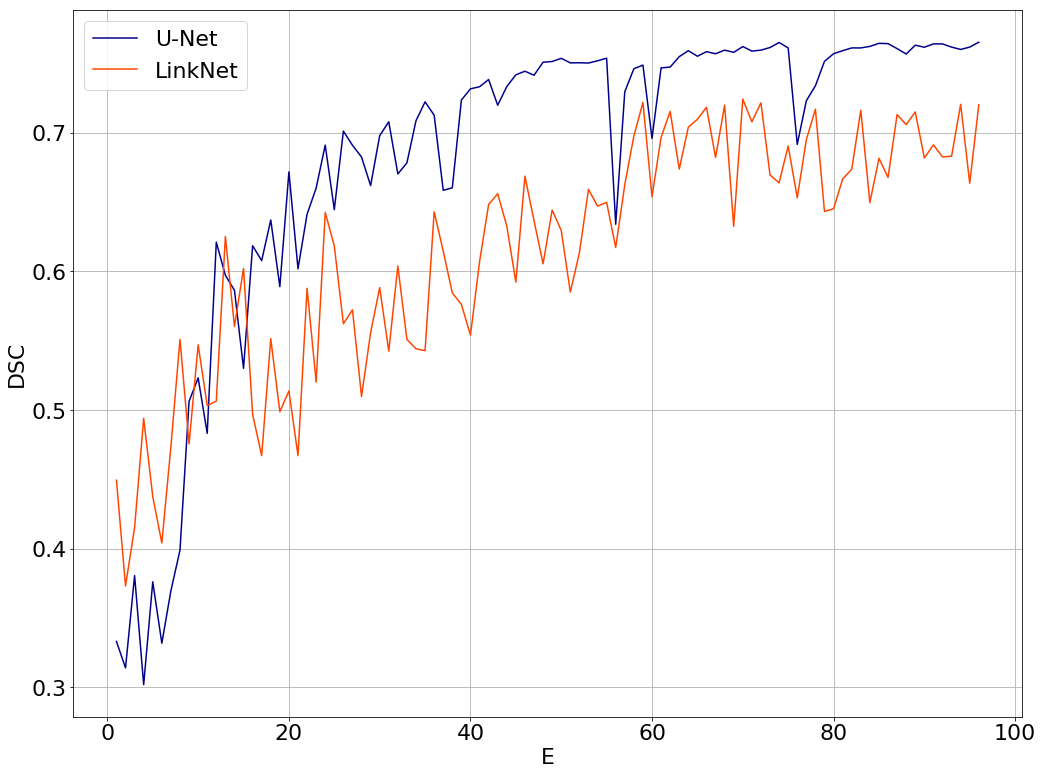

In [50]:
df = pd.read_csv('dsc.csv')
epochs = df['epochs']
unet_dscs = df['unet_dsc']
linknet_dscs = df['linknet_dsc']
plt.figure(figsize=(17, 13))
plt.rcParams.update({'font.size': 22})
plt.xlabel('E')
plt.ylabel('DSC')
plt.plot(epochs[:96], unet_dscs[:96], color = 'darkblue', label='U-Net')
plt.plot(epochs[:96], linknet_dscs[:96], color = 'orangered', label = 'LinkNet')
plt.legend()
plt.grid()
plt.savefig('dsc_e.png')